# The Sparks Foundation internship

 Data Science & Business Analysis.

 Author:Aya Osama.

# Simple Linear Regression
In this regression task we will predict the percentage of an student based on the no.of study hours.This is a simple linear regression task as it involves just 2 variables.

# Importing Dataset

In [36]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [41]:
#load dataset from url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Imported Success")

Data Imported Success


# Visualizing Dataset

In [42]:
#Quick view about the data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [43]:
data.shape

(25, 2)

In [44]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


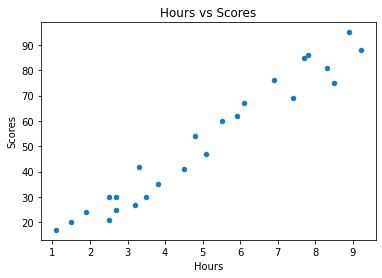

In [64]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Hours vs Scores')  
plt.show()

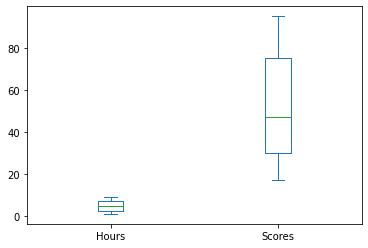

In [47]:
data.plot(kind='box')
plt.show()

In [7]:
data.corr() #correlation coefficients

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

In [48]:
#divide the data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [53]:
print(X)
print('----------------------------')
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
----------------------------
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [54]:
#split this data into training and test sets (20 test,80 train)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training algorithm

In [57]:
#Build linear regression model
from sklearn import linear_model
Linear_regression=linear_model.LinearRegression()
model=Linear_regression.fit(X_train, y_train)
print("Training Done")

Training Done


In [58]:
model.coef_

array([9.91065648])

In [59]:
model.intercept_

2.018160041434683

In [86]:
#Evaluate the model
model.score(X,y)*100

95.26947647057274

#  Visualizing Model

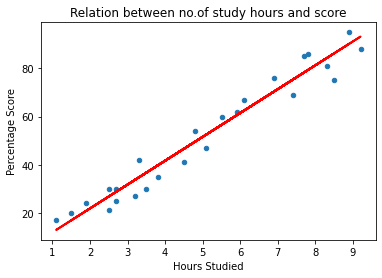

In [65]:
#Visualization the result
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Relation between no.of study hours and score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
#plotting the Regression line
plt.plot(X,model.predict(X),color='red',linewidth=2)
## line =model.coef_*X+model.intercept_

# Prediction

In [68]:
# Testing data - In Hours
print("Testing data",X_test) 
# Predicting the scores
y_pred = model.predict(X_test)
print("----------------------")
print("Predicted Scores",y_pred)

Testing data [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
----------------------
Predicted Scores [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [70]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [84]:
#predict new value of Hours
Hours_new= [[9.25]]
Hours_predict = model.predict(Hours_new)
print("No of Hours = {}".format(Hours_new[0][0]))
print("Predicted Score = {}".format(Hours_predict[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


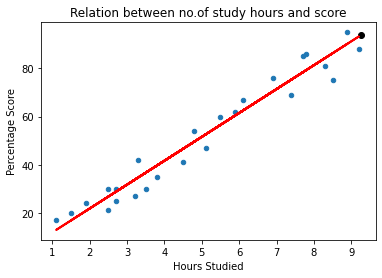

In [87]:
#Visualization the result
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Relation between no.of study hours and score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
#plotting the Regression line
plt.plot(X,model.predict(X),color='red',linewidth=2)
#plotting the predict value
plt.scatter(Hours_new,Hours_predict,color='black' )
plt.show()

# Evaluating model

In [74]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
